In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from os.path import join as oj
import numpy as np
from copy import deepcopy
import pandas as pd
import data
import models
import pickle as pkl
from style import *
import viz
outcome_def = 'y_consec_thresh'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
df = data.get_data(use_processed=True, dset='orig') # all_data=True
dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots

**plot curves**

In [ ]:
plt.figure(figsize=(3, 8))
dfv_minus = dfv[dfv[outcome_def] == 0].sort_values('X_max')
viz.plot_curves(dfv_minus, R=3, C=1, fig=True, ylim_constant=True, legend=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig('figs/fig_traces_minus.pdf')

plt.figure(figsize=(3, 8))
dfv_plus = dfv[dfv[outcome_def] == 0].sort_values('X_max', ascending=False)
viz.plot_curves(dfv_plus, R=3, C=1, fig=True, ylim_constant=True, legend=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig('figs/fig_traces_plus.pdf')

**plot a column of curves**

In [ ]:
plt.figure(figsize=(3, 7))
viz.plot_curves(df, R=3, C=1, fig=True)
plt.xlabel('Time (frames)')
plt.savefig('figs/fig_traces_column.pdf')

# viz hists

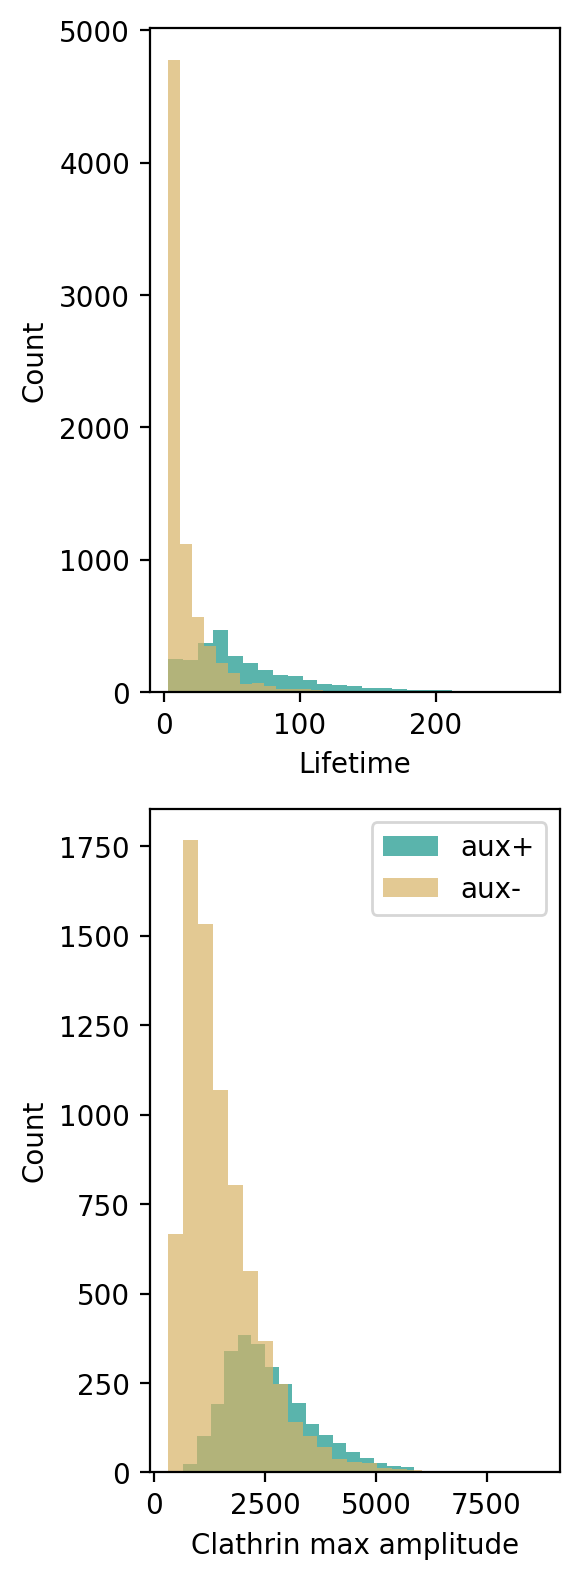

In [69]:
outcome = df[outcome_def]
R, C = 2, 1
plt.figure(figsize=(3, 8), dpi=200)
plt.subplot(R, C, 1)
plt.hist(df['lifetime'][outcome == 1], label='aux+', alpha=1, color=cg, bins=25)
plt.hist(df['lifetime'][outcome == 0], label='aux-', alpha=0.7, color=cy, bins=25)
plt.xlabel('Lifetime')
plt.ylabel('Count')

plt.subplot(R, C, 2)
plt.hist(df['X_max'][outcome == 1], label='aux+', alpha=1, color=cg, bins=25)
plt.hist(df['X_max'][outcome == 0], label='aux-', alpha=0.7, color=cy, bins=25)
plt.xlabel('Clathrin max amplitude')
plt.ylabel('Count')

'''
plt.subplot(R, C, 3)
plt.hist(df['fall'][outcome == 1], label='aux+', alpha=1, color=cb, bins=25)
plt.hist(df['fall'][outcome == 0], label='aux-', alpha=0.7, color=cr, bins=25)
plt.xlabel('Fall')
plt.ylabel('Count')
'''
plt.legend()
plt.tight_layout()

plt.savefig('figs/fig_hists.pdf')
plt.show()

# viz lifetime thresh plots

In [ ]:
from data import *
df = get_tracks()  # note: different Xs can be different shapes
df['pid'] = np.arange(df.shape[0])  # assign each track a unique id
df['valid'] = True  # all tracks start as valid
df['valid'][df.cell_num.isin(cell_nums_test)] = False

In [2]:
print('\tpreprocessing data...')
df = remove_invalid_tracks(df)
df = add_features(df)
df = add_outcomes(df)

	preprocessing data...


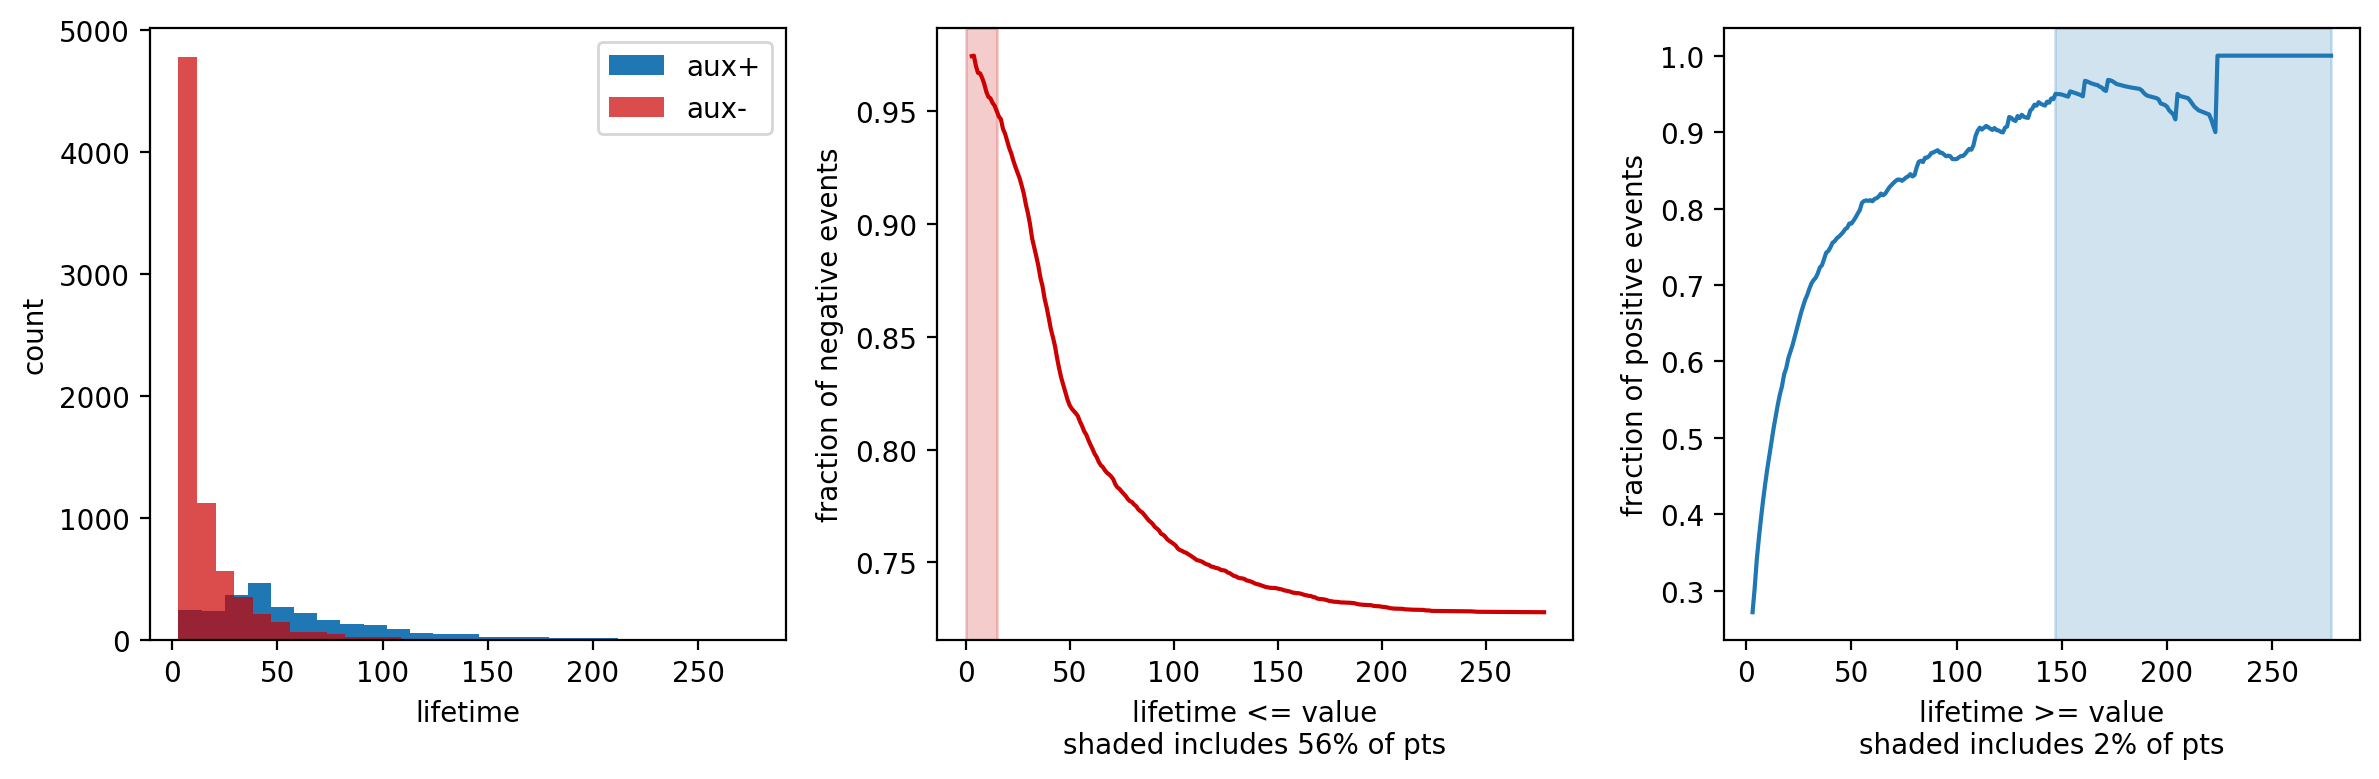

In [7]:
outcome_def='y_consec_thresh'
acc_thresh=0.95

_ = process_tracks_by_lifetime(df, outcome_def=outcome_def, plot=True, acc_thresh=acc_thresh)
plt.savefig('figs/fig_lifetime_thresh.pdf')